# NLP - email spam detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
emails = pd.read_csv('emails.csv')

In [3]:
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [20]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
 2   length  5728 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 134.4+ KB


In [21]:
emails.groupby('spam').describe()

length                                                                  
       count         mean          std   min     25%     50%      75%      max
spam                                                                          
0     4360.0  1631.918119  1959.664549  13.0  577.75  1122.0  2037.25  43952.0
1     1368.0  1317.257310  2271.372893  18.0  401.50   693.5  1250.25  28432.0

In [22]:
emails['length'] = emails['text'].apply(len)
emails

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


<AxesSubplot:ylabel='Frequency'>

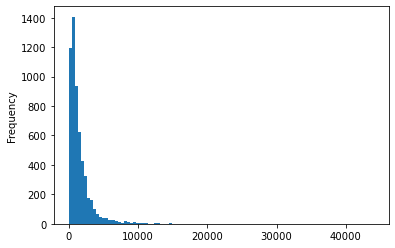

In [23]:
emails['length'].plot(bins=100, kind = 'hist')

<AxesSubplot:xlabel='spam', ylabel='count'>

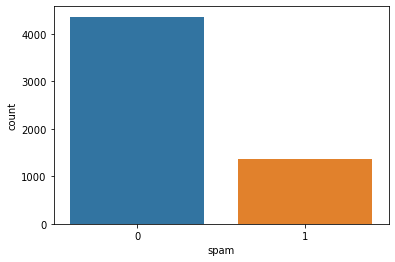

In [24]:
sns.countplot(data=emails,x='spam')

In [25]:
spam = emails[ emails['spam'] == 1]

In [26]:
spam

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


In [27]:
ham = emails[ emails['spam'] == 0]

In [28]:
ham

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
vectorizer = CountVectorizer()

In [31]:
email_vectorizer = vectorizer.fit_transform(emails['text'])

In [32]:
vectorizer.get_feature_names()[5000:5050]

['antaeus',
 'antagonism',
 'antarctic',
 'ante',
 'anteilsverwaltung',
 'antenna',
 'antes',
 'anther',
 'anthony',
 'anthropoid',
 'anthropology',
 'anti',
 'anticipate',
 'anticipated',
 'anticipates',
 'anticipating',
 'anticipation',
 'anticipitory',
 'anticlimax',
 'anticompetitive',
 'antigo',
 'antil',
 'antilbkk',
 'antiperspirant',
 'antique',
 'antiques',
 'antisanctions',
 'antitank',
 'antitrust',
 'antivirus',
 'antly',
 'anto',
 'antonella',
 'antonio',
 'antonioacm',
 'antonioantonio',
 'antonioantoniomc',
 'antoniobdantas',
 'antoniop',
 'antoniopilurzo',
 'antunes',
 'anunauthorized',
 'anurag',
 'anvasetc',
 'anvil',
 'anw',
 'anway',
 'anxious',
 'anxiously',
 'any']

In [33]:
email_vectorizer

<5728x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 708380 stored elements in Compressed Sparse Row format>

In [34]:
email_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
email_vectorizer.shape

(5728, 37303)

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
NB = MultinomialNB()

In [38]:
emails['spam'].values.shape

(5728,)

In [40]:
NB.fit(email_vectorizer,emails['spam'].values)

MultinomialNB()

In [53]:
SampleEmail = ['you won the contest!!!','Dear Dr. ansari I was wondering if you could send me the last version of the thesis']

In [54]:
SampleEmail_vectorized = vectorizer.transform(SampleEmail)

In [55]:
NB.predict(SampleEmail_vectorized)

array([1, 0], dtype=int64)

In [56]:
SampleEmail2 = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']

In [57]:
SampleEmail_vectorized2 = vectorizer.transform(SampleEmail2)

In [58]:
NB.predict(SampleEmail_vectorized2)

array([0, 1], dtype=int64)

In [59]:
from sklearn.model_selection import train_test_split